##**Intro**


Состав команды:

*   Polina Basko
*   Gulnaz Nursultanova
*   Olga Pavlyuck
*   Igor Ageev





In [ ]:
# подключаем необходимые библиотеки
from google.colab import drive
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
# монтируем папку данных с гуглдиска
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Подгружаем 4 датасета
orders = pd.read_csv('/content/drive/MyDrive/MatStat/clients_orders.csv')
control = pd.read_csv('/content/drive/MyDrive/MatStat/time_order_processing_control.csv')
test = pd.read_csv('/content/drive/MyDrive/MatStat/time_order_processing_test.csv')
vendors = pd.read_csv('/content/drive/MyDrive/MatStat/vendors.csv')

##**Задание 1**

Менеджер сайта, предоставляющего независимым продавцам площадку для
продаж, решил провести АБ-тест, выбрав в качестве метрики время обработки
заказов продавцами. Для контрольной группы продавцов оставили предыдущий
интерфейс работы с заказами, а для тестовой группы внедрили интерактивный
дэшборд заказов.

Полученные результаты времени обработки заказов в часах для тестовой и
контрольной групп представлены в csv-файлах time_order_processing_test.csv и
time_order_processing_control.csv.

Проверьте гипотезу менеджера о том, что использование интерактивного
дэшборда уменьшило время обработки заказов.
Подсказка: это независимые выборки.

In [ ]:
test.describe()

,Unnamed: 0,time
count,1393.000000,1393.000000
mean,696.000000,18.009160
std,402.268774,5.857845
min,0.000000,8.000000
25%,348.000000,13.840000
50%,696.000000,17.480000
75%,1044.000000,21.520000
max,1392.000000,44.520000


In [ ]:
control.describe()

,Unnamed: 0,time
count,1393.000000,1393.000000
mean,696.000000,29.502828
std,402.268774,8.979888
min,0.000000,8.320000
25%,348.000000,23.040000
50%,696.000000,28.840000
75%,1044.000000,35.200000
max,1392.000000,67.160000


Видим, что в тестовой группе уменьшился среднее время обработки заказа и старндартное отклонение по сравнению с контрольной.

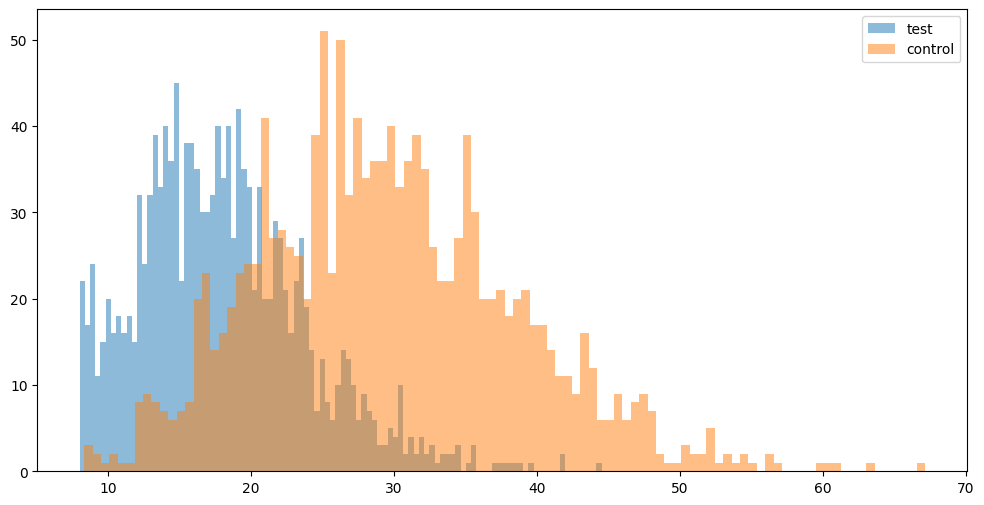

In [ ]:
# Сравним визуально распределение в тестовой и контрольной группах
plt.figure( figsize=(12,6))
plt.hist(test['time'], bins=100, alpha=0.5, label='test')
plt.hist(control['time'], bins=100, alpha=0.5, label='control')
plt.legend(loc='upper right')
plt.show()


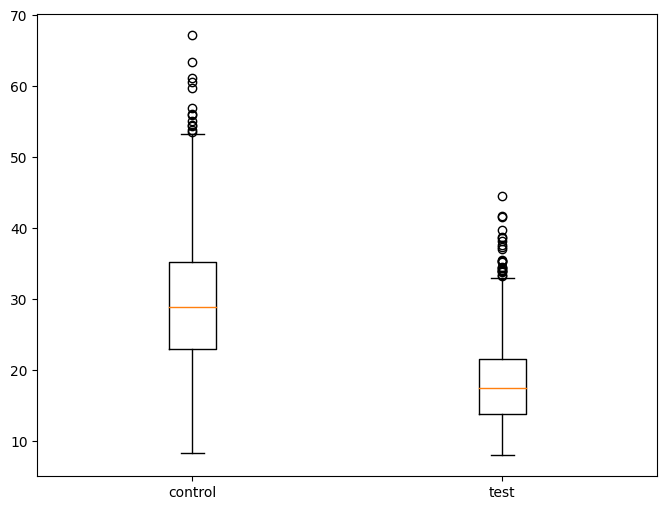

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot([control['time'], test['time']], labels=['control', 'test'])
plt.show()

In [ ]:
avg_test = test['time'].mean()
std_test = test['time'].std()

avg_ctrl = control['time'].mean()
std_ctrl = control['time'].std()

print(f'среднее плюс/минус три сигмы для тестовой группы: {avg_test - 3*std_test} / {avg_test + 3*std_test}')
print(f'среднее плюс/минус три сигмы для контрольной группы: {avg_ctrl - 3*std_ctrl} / {avg_ctrl + 3*std_ctrl}')

среднее плюс/минус три сигмы для тестовой группы: 0.43562592498145136 / 35.582694247308574
среднее плюс/минус три сигмы для контрольной группы: 2.563165330928509 / 56.4424915247786


In [ ]:
# сравним коэффициенты скошенности Пирсона
med_test = test['time'].median()
med_ctrl = control['time'].median()

print(f'Второй коэффициент скошенности Пирсона для тестовой группы - {3*(avg_test-med_test)/std_test}')
print(f'Второй коэффициент скошенности Пирсона для контрольной группы - {3*(avg_ctrl-med_ctrl)/std_ctrl}')

Второй коэффициент скошенности Пирсона для тестовой группы - 0.27100074075195485
Второй коэффициент скошенности Пирсона для контрольной группы - 0.221437656039689


In [ ]:
# посмотрим на стандартные отклонения
print(std_test)
print(std_ctrl)

5.857844720387853
8.979887698975014


In [ ]:
# т.к выборки независимые и t-тест устойчив к разнице стандартных отклонений до 4 раз, можем использовать его
# нулевая гипотеза: средние контрольной и тестовой группы равны, альтернативная: среднее тестовой подвыборки меньше, чем контрольной

test_sample = test['time']
ctrl_sample = control['time']
alpha = 0.05  # уровень статистической значимости

results = st.ttest_ind(test_sample, ctrl_sample,
                       alternative = "less") # less / greater/ two-sided

print('p-значение:', results.pvalue)
print('t-статистика:', results.statistic)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.9949647128013707e-277
t-статистика: -40.01055525962125
Отвергаем нулевую гипотезу


На собранных данных отвергаем нулевую гипотезу о равенстве среднего времени обработки заказов для двух групп на любом принятом уровне значимости (даже на 1%), p-value очень мало. Делаем вывод, что с внедрением интерактивного интерфейса время обработки заказов уменьшилось

Уменьшилось не только среднее время обработки заказов, но и дисперсия (разброс) времени обработки заказа

##**Задание 2**
Этот же маркетплейс предоставил с 1 мая часто заказывающим клиентам
бесплатную доставку, действующую для всех заказов до конца календарного
месяца, если в этом месяце клиент уже сделал пять заказов (то есть начиная с
шестого заказа).

В файле clients_orders.csv представлена информация о количестве заказов,
которое тысяча случайно отобранных часто заказывающих клиентов сделали в
апреле и мае.

Проверьте гипотезу о том, что клиенты стали делать больше заказов после
введения бесплатной доставки с шестого заказа.
Подсказка: это зависимая (парная) выборка.

In [ ]:
orders['orders_april'].describe()

count    1000.000000
mean        5.762000
std         3.006392
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        14.000000
Name: orders_april, dtype: float64

In [ ]:
orders['orders_may'].describe()

count    1000.000000
mean        7.982000
std         2.414437
min         2.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        14.000000
Name: orders_may, dtype: float64

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    1000 non-null   int64
 1   orders_april  1000 non-null   int64
 2   orders_may    1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [ ]:
print(orders[orders['orders_april'] == 5].count())
print(orders[orders['orders_may'] == 5].count())

Unnamed: 0      107
orders_april    107
orders_may      107
dtype: int64
Unnamed: 0      93
orders_april    93
orders_may      93
dtype: int64


Количество клиентов 5 заказами уменьшилось в апреле, часть решила воспользоватся предложением?

Аналогично

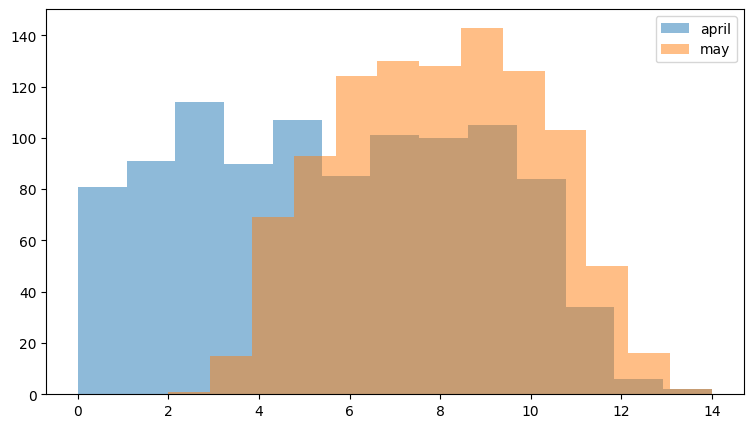

In [ ]:
# Сравним визуально распределение в тестовой и контрольной группах
plt.figure( figsize=(9,5))
plt.hist(orders['orders_april'], bins=13, alpha=0.5, label='april')
plt.hist(orders['orders_may'], bins=13, alpha=0.5, label='may')
plt.legend(loc='upper right')
plt.show()

<Axes: >

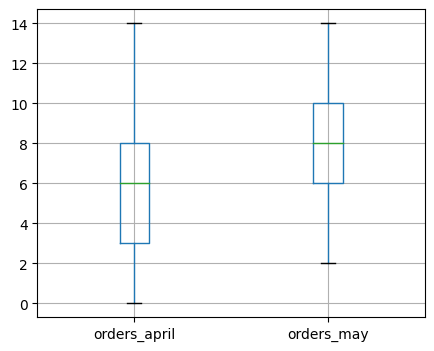

In [ ]:
# посмотрим бокс-плоты, хотя уже по сравнению квантилей можно сделать кое-какие выводы и предположения (что вероятностная масса сдвинулась вправо)
orders.boxplot(column = ['orders_april', 'orders_may'], figsize=(5,4), whis=3)
# собственно это же и видим на бокс-плоте

In [ ]:
# проверим гипотезу. помним, что выборки зависимые
# нулевая гипотеза: среднее число заказов в мае и апреле равны, альтернативная: среднее число заказов в мае больше

april_sample = orders['orders_april']
may_sample = orders['orders_may']

alpha = 0.01 # уровень статистической значимости

results = st.ttest_rel(may_sample, april_sample,
                       alternative = "greater") # less / greater/ two-sided

print('p-значение:', results.pvalue)
print('t-статистика:', results.statistic)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8066025158955254e-64
t-статистика: 18.171999762294778
Отвергаем нулевую гипотезу


На имеющихся данных отвергаем нулевую гипотезу о равенстве среднего кол-ва заказов в пользу альтернативной (кол-во заказов в Мае после введения бесплатной доставки с 6 заказа стало больше) на уровне значимости даже в 1% (p-value мало)

Вопрос, а будет ли расти совокупная выручка или люди будут склонны месяц активно покупать, а потом делать паузу в месяц, чтобы потом опять получать бесплатную доставку?

In [ ]:
orders['orders_may'].sum()

7982

In [ ]:
orders['orders_april'].sum()

5762

count    1000.000000
mean        2.220000
std         3.863227
min       -10.000000
25%        -1.000000
50%         2.000000
75%         5.000000
max        12.000000
Name: diff, dtype: float64

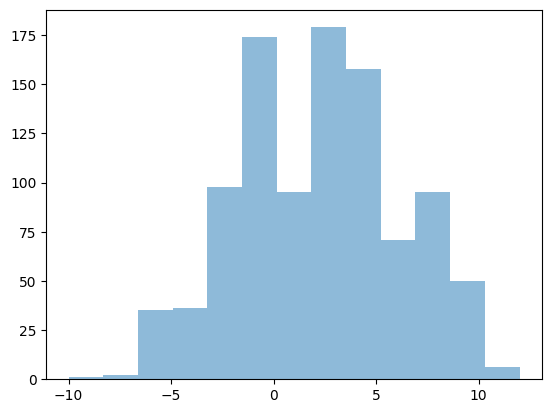

In [ ]:
# количество заказов в сумме выросло
# проверим, как распределена разница в кол-ве заказов
orders['diff'] = orders['orders_may'] - orders['orders_april']

plt.hist(orders['diff'], bins=13, alpha=0.5, label='april')
orders['diff'].describe()

## **Задание 3**
В файле vendors.csv представлена анонимизированная информация о
продавцах маркетплейса: тип продукции ( goods ) и время осуществления
продаж через этот маркетплейс ( experience ).


Переменная goods принимает значения:*Курсив*

clothes — одежда

electronics — электроника и техника

outdoor — товары для активного отдыха

beauty — косметика и товары для ухода

pets — товары для животных


Переменная experience принимает значения:

0-1 — до одного года продаж

1-3 — от одного до трёх лет продаж

3-5 — от трёх до пяти лет продаж

5- — от пяти лет продаж

Проверьте гипотезу о том, что стаж продаж на маркетплейсе не зависит от типа
реализуемой продукции.

In [ ]:
 # сначала сгруппируем данные и просто посмотрим на них
table = vendors.groupby(['goods','experience']).count().unstack()
table

Unnamed: 0             
experience         0-1  1-3 3-5  5-
goods                              
beauty              40   65  22  26
clothes            104  129  42  46
electronics         68   67  29  31
outdoor             36   46  23  26
pets                13   17   4   5

In [ ]:
# нулевая гипотеза: стаж продаж на маркетплейсе не зависит от типа реализуемой продукции
from scipy.stats import chi2_contingency

res = chi2_contingency(table,lambda_=0.05)
print(f'статистика: {res.statistic}')
print(f'p-value: {res.pvalue}')
print(f'степеней свободы: {res.dof}')

статистика: 9.187702599628594
p-value: 0.686820023603987
степеней свободы: 12


In [ ]:
# p-value больше любого уровня значимости, нулевая гипотеза не отвергается

## **Задание 4**
Постройте 90%-е доверительные интервалы по выборкам из задания 1 для
среднего времени обработки заказа продавцами, использующими и не
использующими интерактивный дашборд.

In [ ]:
# Стандартное отклонение с поправкой Бесселя
std_test_1 = np.std(test['time'], ddof=1)
std_ctrl_1 = np.std(control['time'], ddof=1)
#std_test = test['time'].std()
print(std_test_1)
print(std_ctrl_1)

5.857844720387853
8.979887698975014


In [ ]:
print(std_test)
print(std_ctrl)

5.857844720387853
8.979887698975014


In [ ]:
norm_rv = st.norm(loc=0, scale=1)

alpha = 0.1
z_alpha = norm_rv.ppf(1 - alpha/2)

# оценка стандартного отклонения выборочного распределения
test_ese = std_test/np.sqrt(len(test))
ctrl_ese =  std_ctrl/np.sqrt(len(control))

# считаем границы для тестовой и контрольной групп
left_test = avg_test - z_alpha*test_ese
right_test = avg_test + z_alpha*test_ese

left_ctrl = avg_ctrl - z_alpha*ctrl_ese
right_ctrl = avg_ctrl + z_alpha*ctrl_ese

print(f'90%-ный доверительный интервал для тестовой группы: от {left_test} до {right_test}')
print(f'90%-ный доверительный интервал для контрольной группы: от {left_ctrl} до {right_ctrl}')

90%-ный доверительный интервал для тестовой группы: от 17.750999728642142 до 18.267320443647883
90%-ный доверительный интервал для контрольной группы: от 29.107076896469582 до 29.898579959237527


In [ ]:
# построим асимптотический доверительный интервал, используя встроенный функционал
# для тестовой группы
print(st.norm.interval(0.9, loc = avg_test, scale = test_ese))
# для контрольной группы
print(st.norm.interval(0.9, loc = avg_ctrl, scale = ctrl_ese))

# получаем идентичный результат

(17.750999728642142, 18.267320443647883)
(29.107076896469582, 29.898579959237527)


(17.750999728642142, 18.267320443647883)

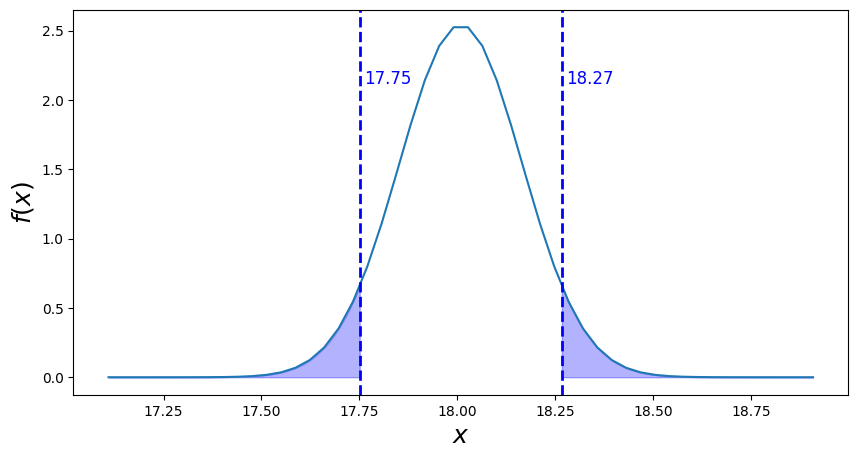

In [ ]:
# построим график

def norm_conf_interval(alpha, mean=0, std=1, margin=0.9):
  plt.figure(figsize =(10,5))

  xs = np.linspace(mean - margin, mean + margin)
  pdf = st.norm(mean, std).pdf(xs)

  plt.plot(xs, pdf)
  plt.ylabel('$f(x)$', fontsize=18)
  plt.xlabel('$x$', fontsize=18)

  left, right = st.norm.interval(1-alpha, loc = mean, scale = std)

  for i in [left, right]:
    y_max=plt.ylim()[1]
    plt.axvline(i, color = "blue", linestyle = 'dashed', lw =2)

    if i == left:
      xq = np.linspace(mean - margin, left)
    else:
      xq = np.linspace(right, mean + margin)

    text_margin=0.01
    plt.text(i + text_margin, 0.8*y_max, round(i,2), color="blue", fontsize=12)
    yq = st.norm(mean, std).pdf(xq)
    plt.fill_between(xq, 0, yq, color = 'blue', alpha = 0.3)

  return left, right

# для тестовой подвыборки
norm_conf_interval(0.1, avg_test, test_ese)

(29.107076896469582, 29.898579959237527)

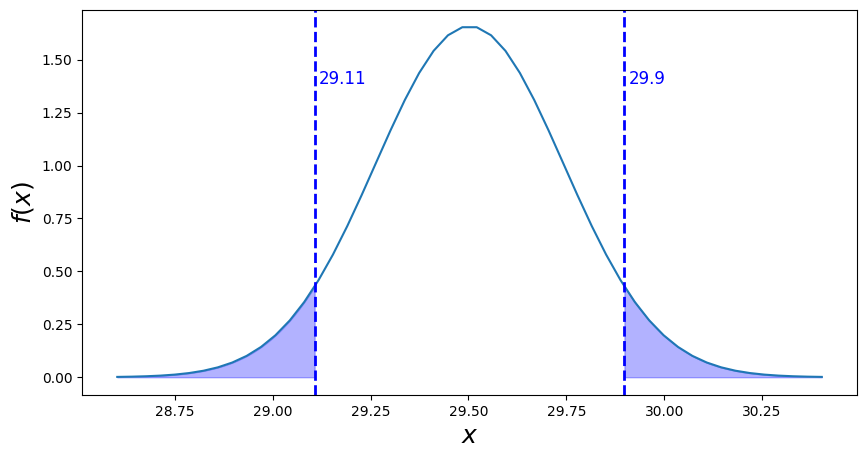

In [ ]:
# для контрольной подвыборки
norm_conf_interval(0.1, avg_ctrl, ctrl_ese)